# L2 – Multilayer perceptron

### Pytorch
1. [Installing](https://pytorch.org/get-started/locally/)
2. [Basics](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
3. [Mnist and more](https://pytorch.org/tutorials/beginner/nn_tutorial.html)
5. [Visualization](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)

### One more thing
1. [Plot.ly](https://plot.ly/python/)
2. [Widgets](http://jupyter.org/widgets.html)

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pylab
from matplotlib import cm
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable

import seaborn as sns
sns.set(style="darkgrid")
 
%matplotlib inline

In [ ]:
pip install torch===1.7.0 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 776.7MB 23kB/s 
     |████████████████████████████████| 12.8MB 32.8MB/s 
     |████████████████████████████████| 7.6MB 43.8MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


### 1. Linear multi-classification problem

We have already learned binary linear classifier
$$y = \text{sign}(w^Tx).$$
There are [several approaches](https://en.wikipedia.org/wiki/Multiclass_classification) to solve the problem of multi-class classification. For example [reduction](https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_Binary) of problem to binary classifier or [modification](https://en.wikipedia.org/wiki/Support_vector_machine#Multiclass_SVM) of the known model. However we are interested in approaches that is applied in neural networks.

For each class $c \in 1, \dots, |C|$ we have an individual row $w_i$ of matrix $W$. Then the probability of $x$ belonging to a particular class is equal to
$$p_i = \frac{\exp(w^T_ix)}{\sum_j \exp(w^T_jx)}.$$
This is nothing, but [softmax](https://en.wikipedia.org/wiki/Softmax_function) function of $Wx$.
$$(p_1, \dots, p_{|C|}) = \text{softmax}(Wx).$$

If you look closely, $\text{softmax}$ is a more general variant of sigmoid. To see this, it suffices to consider the case $|C|=2$. As usual the training can be reduced to minimization of the empirical risk, namely, optimization problem
$$\arg\min_W Q(W) = \arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)).$$
Actually, the maximization of the log-likelihood is written above.

#### Exercises
1. Find $\frac{dQ}{dW}$ in matrix form (hint: start with $\frac{dQ}{dw_i}$ for begining).
2. Please plot several mnist images (e.g using grid 5x5).
3. Train linear multi-label classifier for mnist dataset with Pytorch.
4. Chek accuracy on train and validation sets.
5. Use a local TensorBoard to visualize resulted graph (no need to include in lab).

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw





Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [ ]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([64, 1, 28, 28])

In [ ]:
labels

tensor([3, 6, 9, 3, 7, 7, 2, 0, 8, 2, 5, 7, 1, 2, 3, 9, 7, 4, 6, 3, 0, 2, 0, 4,
        4, 3, 7, 0, 4, 1, 5, 5, 0, 8, 6, 8, 6, 2, 2, 7, 8, 1, 4, 7, 7, 5, 7, 0,
        5, 1, 6, 0, 3, 1, 4, 9, 7, 7, 8, 0, 9, 7, 7, 6])

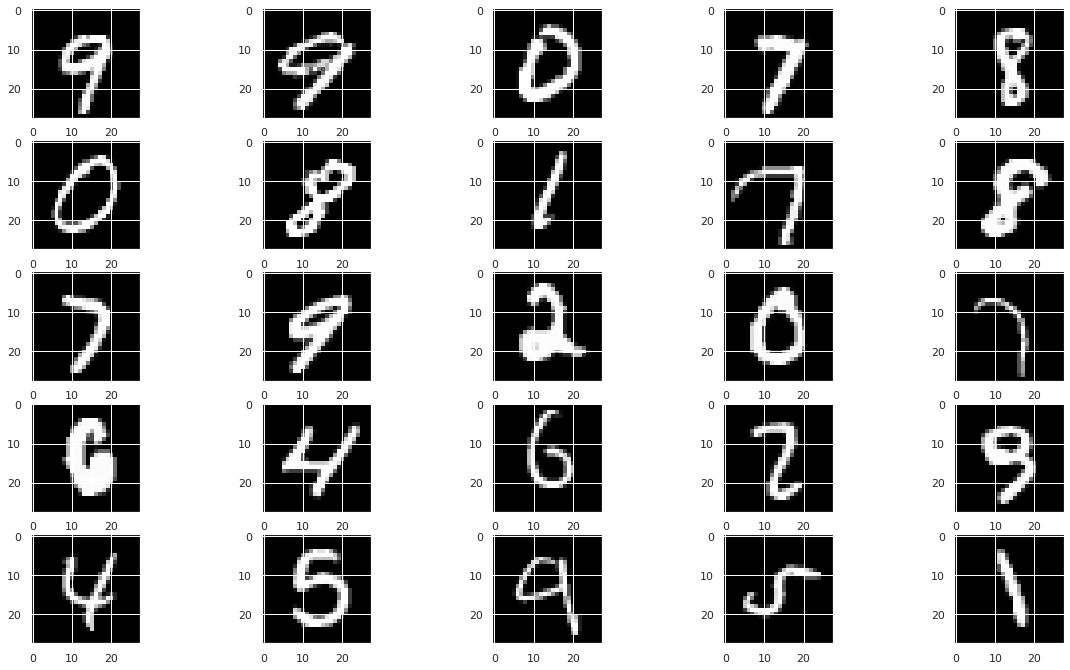

In [ ]:
plt.figure(figsize=(20, 60))
images, labels = next(iter(trainloader))

plt.title('Визуализация нескольких цифр из MNIST')
sp = 1
for i in range(25):  
    plt.subplot(25, 5, sp)
    plt.imshow(images[i].numpy().squeeze(), cmap=plt.get_cmap('gray'))
    sp += 1

plt.show()

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): Softmax(dim=1)
)


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
time0 = time()
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = nn.NLLLoss()(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

print("Training Time (in minutes) =", (time()-time0) / 60)

Training Time (in minutes) = 2.1057281454404193


In [ ]:
correct_count, all_count = 0, 0
for images, labels in trainloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Accuracy на обучающей выборке = %.4f" % (correct_count / all_count))

Accuracy на обучающей выборке = 0.9265


In [ ]:
correct_count, all_count = 0, 0
for images, labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Accuracy на валидационной выборке = %.4f" % (correct_count / all_count))

Accuracy на валидационной выборке = 0.9220


Let's briefly touch on themes of regularization. As was discussed before, there are different approaches. We focus on the modification of loss function.

$$\arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)) + \lambda_1 L_1(W) + \lambda_2 L_2(W)$$

1. $L_1(W) = sum_{i,j} |w_{i,j}|$ - sparsify weights (force to not use uncorrelated features)
2. $L_2(W) = sum_{i,j} w_{i,j}^2$ - minimize weights (force to not overfit)

#### Exercises
1. Train model again using both type of regularization.
2. Plot matrix of weights.
3. Which pixels have zero weights? What does it mean?
4. Have you improved accuracy on validation?

In [ ]:
optimizer = optim.Adam(model.parameters(), weight_decay=1e-5)
time0 = time()
epochs = 10
for e in range(epochs):
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = nn.NLLLoss()(output, labels)
        loss.backward()
        optimizer.step()

print("Training Time (in minutes) =", (time()-time0) / 60)

Training Time (in minutes) = 2.119345450401306


In [ ]:
correct_count, all_count = 0, 0
for images, labels in trainloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Accuracy на обучающей выборке с L2 = %.4f" % (correct_count / all_count))

Accuracy на обучающей выборке с L2 = 0.9346


In [ ]:
correct_count, all_count = 0, 0
for images, labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Accuracy на валидационной выборке с L2 = %.4f" % (correct_count / all_count))

Accuracy на валидационной выборке с L2 = 0.9270


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
time0 = time()
epochs = 10
lamb = 0.5
for e in range(epochs):
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        cross_entropy_loss = F.cross_entropy(output, labels)
        all_params = torch.cat([x.view(-1) for x in model.parameters()])
        l1_regularization = lamb * torch.norm(all_params, 1)
        loss = cross_entropy_loss + l1_regularization
        loss.backward()
        optimizer.step()

print("Training Time (in minutes) =",(time()-time0) / 60)

Training Time (in minutes) = 2.183149190743764


In [ ]:
correct_count, all_count = 0, 0
for images, labels in trainloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Accuracy на обучающей выборке с L1 = %.4f" % (correct_count / all_count))

Accuracy на обучающей выборке с L1 = 0.1120


In [ ]:
correct_count, all_count = 0, 0
for images, labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    #print(len(logps))
    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])

    #print(probab)
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    #print(true_label, pred_label)
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Accuracy на валидационной выборке с L1 = %.4f" % (correct_count / all_count))

Accuracy на валидационной выборке с L1 = 0.1147


То что пиксели имеют нулевой вес значит то, что произошло затухание градиента и некоторые пиксели "вымерли".

In [ ]:
model[0].weight.grad

tensor([[-0.5037,  0.4963,  0.4963,  ..., -0.5037,  0.4963,  0.4963],
        [ 0.4994, -0.5006,  0.4994,  ...,  0.4994,  0.4994, -0.5006],
        [-0.4975, -0.4975,  0.5025,  ...,  0.5025,  0.5025,  0.5025],
        ...,
        [-0.5069,  0.4931, -0.5069,  ..., -0.5069,  0.4931, -0.5069],
        [ 0.5056,  0.5056, -0.4944,  ..., -0.4944,  0.5056,  0.5056],
        [ 0.5057, -0.4943, -0.4943,  ..., -0.4943, -0.4943,  0.5057]])

### 2. Universal approximation theorem

What if we add more layers to our model? Namely, we train two matrix $W_2$ and $W_1$
$$softmax(W_2\cdot(W_1x)).$$

At first glance adding more parameters helps to increase the generalizing ability of the model. Buy actually we have the same model $softmax(Wx)$, where $W = W_2\cdot W_1$. But everyting changes with adding ome more layer. Let's add nonlinear function $\sigma$ between $W_2$ and $W_1$

$$softmax(W_2\cdot \sigma(W_1x)).$$

Kurt Hornik showed in 1991 that it is not the specific choice of the nonlinear function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. The output units are always assumed to be linear. For notational convenience, only the single output case will be shown. The general case can easily be deduced from the single output case.

Let $\sigma(\cdot)$ be a nonconstant, bounded, and monotonically-increasing continuous function.
Let $\mathcal{S}_m \subset \mathbb{R}^m$ denote any compact set. 
Then, given any $\varepsilon > 0$ and any coninuous function $f$ on $\mathcal{S}_m$, there exist an integer $N$ and real constants $v_i$, $b_i$ amd real vectors $w_i$ that

$$\left| \sum _{i=1}^{N}v_{i}\sigma \left( w_i^{T} x+b_i \right) - f(x) \right| < \varepsilon, ~~~ \forall x \in \mathcal{S}_m.$$

The theorem has non-constructive proof, it meams that no estimates for $N$ and no method to find approximation's parameters.

#### Exercises
1. Let $\sigma$ – [heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) and $x \in \{0, 1\}^2$. Prove that $y = \sigma(wx + b)$ can approximate boolean function **OR** (hint: use constructive proof).
2. What about **AND** function?
3. Is it possible to implement **XOR**? Prove your words.
4. Prove that 2-layer network can implement any boolean function.

#### More useful facts:
1. A 2-layer network in in $\mathbb{R}^n$ allows to define convex polyhedron..
2. A 3-layer network in в $\mathbb{R}^n$ allows to define a not necessarily convex and not even necessarily connected area.

2. 

3.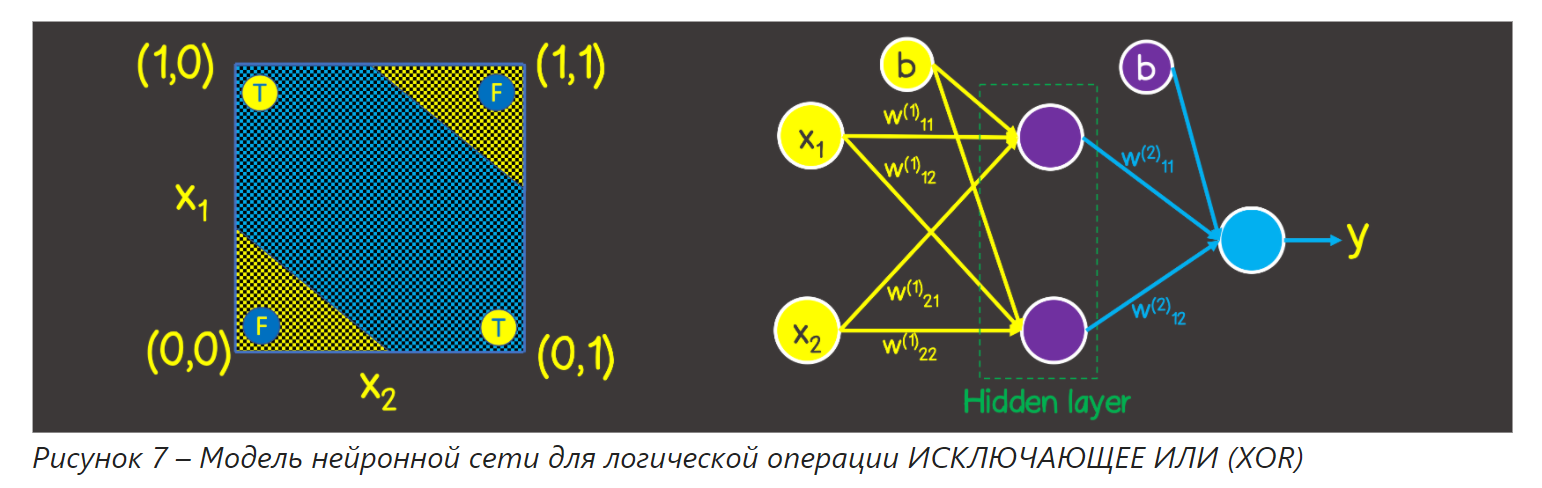

### 3. Backpropagation
Backpropagation is a method used to calculate the error contribution of each layer after a batch of data. It is a special case of an older and more general technique called automatic differentiation. In the context of learning, backpropagation is commonly used by the gradient descent optimization algorithm to adjust the weight of layers by calculating the gradient of the loss function. This technique is also sometimes called backward propagation of errors, because the error is calculated at the output and distributed back through the network layers. The main motivation of method is simplify evaluation of gradient which is complex problem for multilayer nets.

We need the following notation. Let $(y^1,\dots,y^n) = f(x^1,\dots,x^n)$ is some differentiable function and $\frac{dy}{dx}$ is matrix
$$\frac{dy}{dx} = \Big[ J_{ij} = \frac{\partial y^i}{\partial x^j} \Big]$$

Without violating the generality, we can assume that each layer is a function $x_{i} = f(x_{i-1}, w_i)$. As last layer we add loss function, so we can assume our multi-layer net as function $Q(x_0) = Q(f_n(f_{n-1}(\dots, w_{n-1}), w_n))$.

#### Forward step
Propagation forward through the network to generate the output values. Calculation of the loss function.

#### Backward step
Let's look at last layer. We can simply find $\frac{dQ}{dx_n}$. Now we can evaluate 

$$\frac{dQ}{dw_n} = \frac{dQ}{dx_n}\frac{dx_n}{dw_n} \text{ and } \frac{dQ}{dx_{n-1}} = \frac{dQ}{dx_n}\frac{dx_n}{dx_{n-1}}$$

Now we need calculate $\frac{dQ}{dw_{n-2}}$ и $\frac{dQ}{dx_{n-2}}$. But we have the same situation. We know $\frac{dQ}{dx_k}$, so can evaluate $\frac{dQ}{dw_k}$ and $\frac{dQ}{dx_{k-1}}$. Repeating this operation we find all the gradients. Now it's only remains to make a gradient step to update weights.

#### Exercises
1. Read more about [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).
2. Train 2 layer net. Use sigmoid as nonlinearity.
3. Check accuracy on validation set.
4. Use [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) or LeakyReLu as nonlinearity. Compare accuracy and convergence with previous model.
5. Play with different architectures (add more layers, regularization and etc).
6. Show your best model.
7. How does quality change with adding layers. Prove your words, train model for 2, 3, 5, 7 and 10 layers.
8. Using backpropagation find optimal  digit 8 for your net.*

In [ ]:
input_size = 784
hidden_size = 128
output_size = 10

model_1 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.Sigmoid(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

model_2 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

model_3 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

In [ ]:
def fit_model(mod):
    print(mod[1])
    
    optimizer = optim.Adam(mod.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    time0 = time()
    epochs = 10
    for e in range(epochs):
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output = mod(images)
            loss = nn.NLLLoss()(output, labels)
            loss.backward()
            optimizer.step()

    print("Время обучения = ", (time()-time0) / 60, sep='')

In [ ]:
def count_accuracy(mod):
    print(mod[1])
    
    correct_count, all_count = 0, 0
    for images, labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = mod(img)
    
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if (true_label == pred_label):
                correct_count += 1
            all_count += 1

    print("Accuracy на валидационной выборке = %.4f" % (correct_count / all_count))

In [ ]:
fit_model(model_1)
fit_model(model_2)
fit_model(model_3)

Sigmoid()
Время обучения = 2.3126936157544455
ReLU()
Время обучения = 2.4037567377090454
LeakyReLU(negative_slope=0.01)
Время обучения = 2.315305991967519


In [ ]:
count_accuracy(model_1)
count_accuracy(model_2)
count_accuracy(model_3)

Sigmoid()
Accuracy на валидационной выборке = 0.9737
ReLU()
Accuracy на валидационной выборке = 0.9541
LeakyReLU(negative_slope=0.01)
Accuracy на валидационной выборке = 0.9629


Уменьшим размер скрытого слоя, иначе мы умрем считать

In [ ]:
hidden_size = 32

model2 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

model3 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

model5 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

model7 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

model10 = nn.Sequential(nn.Linear(input_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.LeakyReLU(),
                        nn.Linear(hidden_size, output_size),
                        nn.Softmax(dim=1))

In [ ]:
fit_model(model2)
fit_model(model3)
fit_model(model5)
fit_model(model7)
fit_model(model10)

LeakyReLU(negative_slope=0.01)
Время обучения = 2.104679588476817
LeakyReLU(negative_slope=0.01)
Время обучения = 2.172405509154002
LeakyReLU(negative_slope=0.01)
Время обучения = 2.263825233777364
LeakyReLU(negative_slope=0.01)
Время обучения = 2.3958370367685955
LeakyReLU(negative_slope=0.01)
Время обучения = 2.6892333666483563


In [ ]:
print('2 слоя с LeakyReLU:')
count_accuracy(model2)
print('3 слоя с LeakyReLU:')
count_accuracy(model3)
print('5 слоев с LeakyReLU:')
count_accuracy(model5)
print('7 слоев с LeakyReLU:')
count_accuracy(model7)
print('10 слоев с LeakyReLU:')
count_accuracy(model10)

2 слоя с LeakyReLU:
LeakyReLU(negative_slope=0.01)
Accuracy на валидационной выборке = 0.8481
3 слоя с LeakyReLU:
LeakyReLU(negative_slope=0.01)
Accuracy на валидационной выборке = 0.9472
5 слоев с LeakyReLU:
LeakyReLU(negative_slope=0.01)
Accuracy на валидационной выборке = 0.9441
7 слоев с LeakyReLU:
LeakyReLU(negative_slope=0.01)
Accuracy на валидационной выборке = 0.9146
10 слоев с LeakyReLU:
LeakyReLU(negative_slope=0.01)
Accuracy на валидационной выборке = 0.6316


Можем заметить, что сначала с увеличением слоев каечство растет. а затем падает. В нашем случае оптимальное количество слоев вышло = 3. Далее с ростом количества слое нейронная сеть переобучается и выдет более плохие результаты на валидационной выборке. Проверим свою гипотезу и посчитаем качество на обучающей выборке.

In [ ]:
def count_accuracy_train(mod):
    correct_count, all_count = 0, 0
    for images, labels in trainloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = mod(img)
    
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if (true_label == pred_label):
                correct_count += 1
            all_count += 1

    print("Accuracy на обучающей выборке = %.4f" % (correct_count / all_count))

In [ ]:
print('2 слоя с LeakyReLU:')
count_accuracy_train(model2)
print('3 слоя с LeakyReLU:')
count_accuracy_train(model3)
print('5 слоев с LeakyReLU:')
count_accuracy_train(model5)
print('7 слоев с LeakyReLU:')
count_accuracy_train(model7)
print('10 слоев с LeakyReLU:')
count_accuracy_train(model10)

2 слоя с LeakyReLU:
Accuracy на обучающей выборке = 0.8499
3 слоя с LeakyReLU:
Accuracy на обучающей выборке = 0.9493
5 слоев с LeakyReLU:
Accuracy на обучающей выборке = 0.9405
7 слоев с LeakyReLU:
Accuracy на обучающей выборке = 0.9137
10 слоев с LeakyReLU:
Accuracy на обучающей выборке = 0.6288


Ан, нет...

### 4. Autoencoders
An autoencoder is an network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Also, this technique can be used to train deep nets.

Architecturally, the simplest form of an autoencoder is a feedforward net very similar to the multilayer perceptron (MLP), but with the output layer having the same number of nodes as the input layer, and with the purpose of reconstructing its own inputs. Therefore, autoencoders are unsupervised learning models. An autoencoder always consists of two parts, the encoder and the decoder. Encoder returns latent representation of the object (compressed representation, usuallu smaller dimension), but decoder restores object from this latent representation. Autoencoders are also trained to minimise reconstruction errors (e.g. MSE).

